# House Price Prediction

Import libraries for reading files and plotting and statistical calculations

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### Read train set:


In [2]:
train_data_frame = pd.read_csv("./train.csv")
train_data_frame

,Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
0,1,60,RL,8450,Normal,208500
1,2,20,RL,9600,Normal,181500
2,3,60,RL,11250,Normal,223500
3,4,70,RL,9550,Abnorml,140000
4,5,60,RL,14260,Normal,250000
...,...,...,...,...,...,...
1455,1456,60,RL,7917,Normal,175000
1456,1457,20,RL,13175,Normal,210000
1457,1458,70,RL,9042,Normal,266500
1458,1459,20,RL,9717,Normal,142125


#### take a deep look at the trainset and normalize:

In [3]:
train_data_frame.shape

(1460, 6)

In [4]:
train_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   SaleCondition  1460 non-null   object
 5   SalePrice      1460 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


values of MSZoning and SaleCondition are not numeric! We have to map their values to numeric.

In [5]:
train_data_frame['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [6]:
MSZoning_label={'RL':0, 'RM':1,'C (all)':2, 'FV':3, 'RH':4 }
train_data_frame['MSZoning'] = train_data_frame['MSZoning'].replace(MSZoning_label)
train_data_frame['MSZoning'].head()

0    0
1    0
2    0
3    0
4    0
Name: MSZoning, dtype: int64

In [7]:
train_data_frame['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [8]:
SaleCondition_label = {'Normal':0, 'Abnorml':1, 'Partial':2, 'AdjLand':3, 'Alloca':4, 'Family':5}
train_data_frame['SaleCondition'] = train_data_frame['SaleCondition'].replace(SaleCondition_label)
train_data_frame['SaleCondition'].head()

0    0
1    0
2    0
3    1
4    0
Name: SaleCondition, dtype: int64

In [9]:
train_data_frame.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
SaleCondition    0
SalePrice        0
dtype: int64

Fine! there is no missing values

In [10]:
train_data_frame.describe()

,Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000
mean,730.500000,56.897260,0.340411,10516.828082,0.35000,180921.195890
std,421.610009,42.300571,0.798309,9981.264932,0.88787,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,0.00000,34900.000000
25%,365.750000,20.000000,0.000000,7553.500000,0.00000,129975.000000
50%,730.500000,50.000000,0.000000,9478.500000,0.00000,163000.000000
75%,1095.250000,70.000000,0.000000,11601.500000,0.00000,214000.000000
max,1460.000000,190.000000,4.000000,215245.000000,5.00000,755000.000000


In [11]:
train_data_frame.corr()

,Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.011949,-0.033226,-0.017712,-0.021917
MSSubClass,0.011156,1.000000,0.286937,-0.139781,-0.015047,-0.084284
MSZoning,-0.011949,0.286937,1.000000,-0.161640,0.068705,-0.116047
LotArea,-0.033226,-0.139781,-0.161640,1.000000,0.000199,0.263843
SaleCondition,-0.017712,-0.015047,0.068705,0.000199,1.000000,0.142503
SalePrice,-0.021917,-0.084284,-0.116047,0.263843,0.142503,1.000000


As their correlation is not high, it does not seem to linear regression is a good model. Anyway, I'll try linear regression.

obviously, Id is irrelevant. So let's drop it.

In [12]:
train_data_frame = train_data_frame.drop(['Id'], axis=1)
train_data_frame.head()

,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
0,60,0,8450,0,208500
1,20,0,9600,0,181500
2,60,0,11250,0,223500
3,70,0,9550,1,140000
4,60,0,14260,0,250000


take a better look at train set:

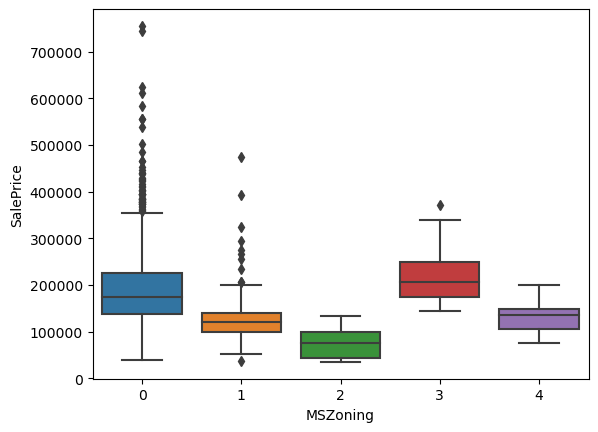

In [13]:
sns.boxplot(data=train_data_frame, x='MSZoning', y='SalePrice' )
plt.show()
#'RL':0, 'RM':1,'C (all)':2, 'FV':3, 'RH':4

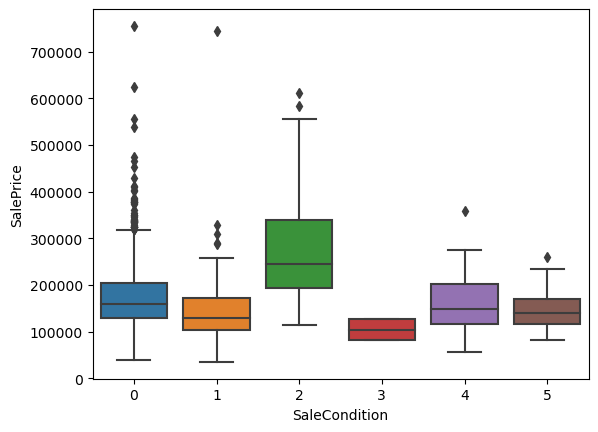

In [14]:
sns.boxplot(x='SaleCondition', y='SalePrice', data=train_data_frame)
plt.show()
#{'Normal':0, 'Abnorml':1, 'Partial':2, 'AdjLand':3, 'Alloca':4, 'Family':5}

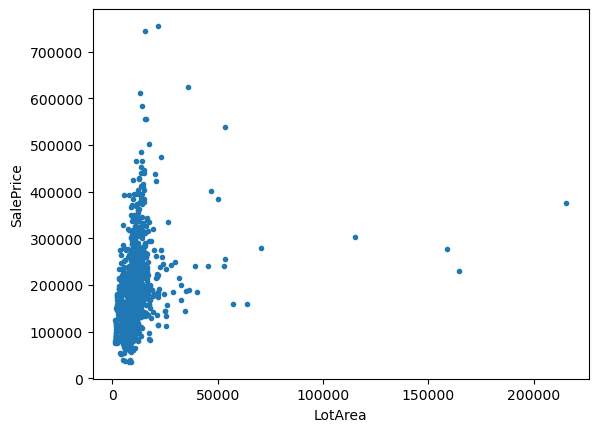

In [15]:
plt.scatter(train_data_frame.LotArea,train_data_frame.SalePrice, marker = '.')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

outlier : train_data_frame.LotArea > 100000 

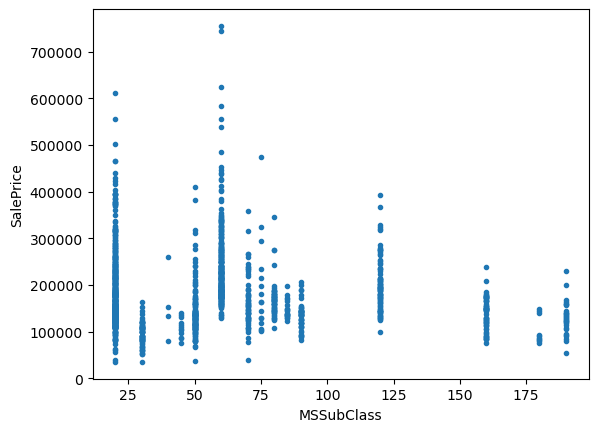

In [16]:
plt.scatter(train_data_frame.MSSubClass,train_data_frame.SalePrice, marker = '.')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.show()

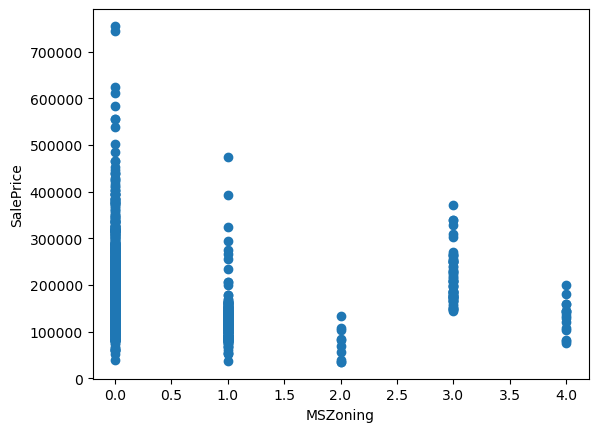

In [17]:
plt.scatter(train_data_frame['MSZoning'],train_data_frame['SalePrice'])
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')# droping 
plt.show()

#'RL':0, 'RM':1,'C (all)':2, 'FV':3, 'RH':4

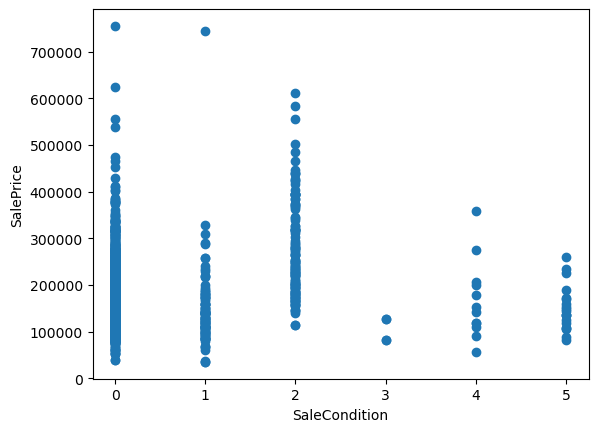

In [18]:
plt.scatter(train_data_frame.SaleCondition ,train_data_frame.SalePrice)
plt.xlabel('SaleCondition')
plt.ylabel('SalePrice')
plt.show()
#{'Normal':0, 'Abnorml':1, 'Partial':2, 'AdjLand':3, 'Alloca':4, 'Family':5}

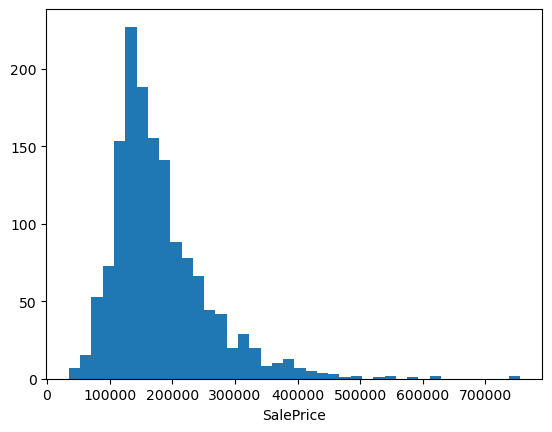

In [19]:
plt.hist(train_data_frame['SalePrice'], 40)
plt.xlabel('SalePrice')
plt.show()

outlier : train_data_frame.SalePrice > 500000

I don't drop outliers now to see the effect of dropping outliers.

#### normalization and separating target from features.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x = train_data_frame.drop('SalePrice', 1)
train_y = train_data_frame['SalePrice']
train_x = scaler.fit_transform(train_x)

C:\Users\158372\AppData\Local\Temp\ipykernel_5896\2192650531.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_x = train_data_frame.drop('SalePrice', 1)


### linear Regression: 
build model and fit on train

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_reg_model = LinearRegression()

linear_reg_model.fit(train_x, train_y)

LinearRegression()

MAE:(train)

In [22]:
y_predict_train = linear_reg_model.predict(train_x)
mae_train_linear_reg = mean_absolute_error(train_y, y_predict_train)
mae_train_linear_reg

54549.50621899699

**drop outliers** to see the effect of dropping outliers on MAE

In [23]:
train_data_frame = train_data_frame[train_data_frame.MSSubClass < 700000]
train_data_frame = train_data_frame[train_data_frame.SalePrice  < 650000]
train_data_frame = train_data_frame[train_data_frame.LotArea    < 200000]

In [24]:

train_x = train_data_frame.drop('SalePrice', 1)
train_y = train_data_frame['SalePrice']
train_x = scaler.fit_transform(train_x)
linear_reg_model.fit(train_x, train_y)
y_predict_train = linear_reg_model.predict(train_x)
mae_train_linear_reg_after_drop_outlier = mean_absolute_error(train_y, y_predict_train)
mae_train_linear_reg_after_drop_outlier

C:\Users\158372\AppData\Local\Temp\ipykernel_5896\1385850473.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_x = train_data_frame.drop('SalePrice', 1)


53507.88966619389

Dropping outliers reduses MAE. Nice!

Now we have to predict the **test set**. So, let's read the test set and convert categorical variables to numerical variables and drop 'Id'.

In [25]:
test_data_frame = pd.read_csv('./test1.csv')
test_data_frame.head()

,Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
0,16,45,RM,6120,Normal,132000
1,23,20,RL,9742,Normal,230000
2,25,20,RL,8246,Normal,154000
3,30,30,RM,6324,Normal,68500
4,35,120,RL,7313,Normal,277500


In [26]:
test_data_frame['MSZoning'] = test_data_frame['MSZoning'].replace(MSZoning_label)
test_data_frame['SaleCondition'] = test_data_frame['SaleCondition'].replace(SaleCondition_label)
test_data_frame = test_data_frame.drop(['Id'], axis=1)
test_data_frame.head()

,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
0,45,1,6120,0,132000
1,20,0,9742,0,230000
2,20,0,8246,0,154000
3,30,1,6324,0,68500
4,120,0,7313,0,277500


In [27]:
test_x = test_data_frame.drop('SalePrice', 1)
test_y = test_data_frame['SalePrice']
test_x = scaler.transform(test_x)

C:\Users\158372\AppData\Local\Temp\ipykernel_5896\2207065431.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_x = test_data_frame.drop('SalePrice', 1)


In [28]:
y_predict_test = linear_reg_model.predict(test_x)
mae_test_linear_reg = mean_absolute_error(test_y, y_predict_test)
mae_test_linear_reg

54731.34160590891

As the correlation between features are not high, I expect to decision tree to predict better than linear regression.

### Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=0)

decision_tree_model.fit(train_x, train_y)

y_predict_train = decision_tree_model.predict(train_x)
mae_train_decision_tree_reg = mean_absolute_error(train_y, y_predict_train)
mae_train_decision_tree_reg

2932.274155418287

In [30]:
y_predict_test = decision_tree_model.predict(test_x)
mae_test_decision_tree_reg = mean_absolute_error(test_y, y_predict_test)
mae_test_decision_tree_reg

2765.1384525887147

In [31]:
print('MAE train linear reg:                   ', mae_train_linear_reg
    ,'\nMAE train linear reg after drop outlier:',mae_train_linear_reg_after_drop_outlier
    ,'\nMAE test linear reg:                    ', mae_test_linear_reg
    ,'\nMAE train decision tree reg:            ',mae_train_decision_tree_reg
    ,'\nMAE test decision tree reg:             ',mae_test_decision_tree_reg)

MAE train linear reg:                    54549.50621899699 
MAE train linear reg after drop outlier: 53507.88966619389 
MAE test linear reg:                     54731.34160590891 
MAE train decision tree reg:             2932.274155418287 
MAE test decision tree reg:              2765.1384525887147


**decision tree reg predicts much better than linear reg**

now save the prediction

In [32]:
dfObj = pd.DataFrame(y_predict_test, columns=['predictsSaleprice'])
dfObj.to_csv('id_predictsSaleprice.csv')